In [64]:
import numpy as np

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
from textblob import TextBlob

In [67]:
df = pd.read_csv('pandas_df.csv')

In [68]:
df.head()

,year,month,day,user_name,favorite_count,retweet_count,text,user_location_ab,word_count,char_count,average_word_len
0,2017,3,11,ADub,0,16427,RT @GeorgeTakei: The GOP wants to ensure the m...,SK,25,139,4.600000
1,2017,6,12,Annapolis NDP,1,0,Urgent-health care planning must be based on a...,NS,16,115,6.250000
2,2017,6,21,Lethbridge living,1,0,This research project is focused on making pri...,AB,13,107,7.307692
3,2017,6,14,THĒ RÅÏŃ MÅÑ ☔️,0,40988,RT @SenSanders: BREAKING: Senate Republicans j...,AB,19,140,6.421053
4,2017,6,8,Steven Holland,0,27,RT @AndreaHorwath: Simply appalling. We have t...,ON,27,148,4.518519


In [69]:
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).polarity)

In [70]:
df.describe()

,year,month,day,favorite_count,retweet_count,word_count,char_count,average_word_len,polarity
count,294528.0,294528.000000,294528.000000,294528.000000,294528.000000,294528.000000,294528.000000,294528.000000,294528.000000
mean,2017.0,7.327738,16.224797,0.975092,5013.614485,18.739149,128.135783,6.200876,0.057429
std,0.0,1.819165,7.757612,163.427522,15043.815285,5.266737,26.182777,1.437555,0.281700
min,2017.0,3.000000,1.000000,0.000000,0.000000,2.000000,11.000000,2.722222,-1.000000
25%,2017.0,6.000000,10.000000,0.000000,1.000000,15.000000,120.000000,5.130435,0.000000
50%,2017.0,7.000000,17.000000,0.000000,37.000000,20.000000,140.000000,5.950000,0.000000
75%,2017.0,9.000000,23.000000,0.000000,1780.000000,23.000000,140.000000,6.833333,0.193750
max,2017.0,10.000000,31.000000,81655.000000,155397.000000,78.000000,811.000000,55.500000,1.000000


In [71]:
df.sort_values(by='polarity')

,year,month,day,user_name,favorite_count,retweet_count,text,user_location_ab,word_count,char_count,average_word_len,polarity
31465,2017,7,25,jph wacheski,0,7264,RT @SenSanders: This is a disgrace. It is insu...,ON,14,100,6.214286,-1.0
98495,2017,5,6,Stegonos,0,524,RT @RoguePOTUSStaff: @realDonaldTrump Worst pa...,ON,22,139,5.363636,-1.0
57093,2017,10,18,Bonnie Jeffrey,0,157,RT @lawdavisito94: BREAKING: Congress has reac...,ON,16,140,7.812500,-1.0
57108,2017,5,6,Tina,0,732,RT @DavidNir: Rachel @Maddow tonight on the in...,AB,22,144,5.590909,-1.0
287877,2017,7,25,Dayna,0,10240,RT @benwikler: If you're involved in the fight...,BC,24,131,4.500000,-1.0
287876,2017,7,24,Steven Penner,0,10239,RT @benwikler: If you're involved in the fight...,ON,24,131,4.500000,-1.0
44365,2017,6,24,Mark Jenkinson,0,129,RT @lalahhathaway: The awful truth. https://t....,ON,6,59,9.000000,-1.0
57130,2017,6,20,gypsy tricia,0,55,RT @PPAdvocatesINKY: Call your Senators. Tell ...,AB,21,140,5.714286,-1.0
98328,2017,9,20,jay jackson,0,767,RT @SenGillibrand: Senate Republicans could ha...,ON,23,140,5.130435,-1.0
20843,2017,6,22,Justin Colwill,0,0,Still think our healthcare system in Canada is...,BC,11,110,9.090909,-1.0


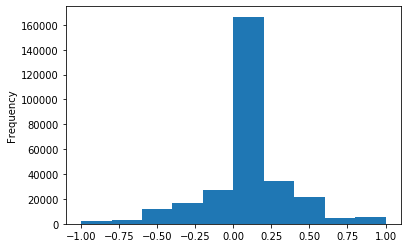

In [72]:
df['polarity'].plot.hist()

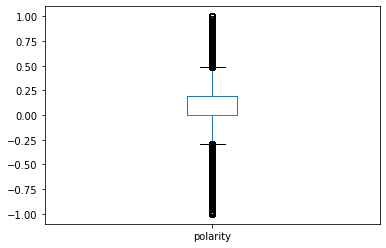

In [73]:
df['polarity'].plot.box()

In [74]:
df.to_csv('labeling_df.csv', encoding='utf-8', index=False)

In [75]:
df1 = df.drop(['year','month','day','user_name','word_count','char_count','average_word_len'],axis=1)

In [76]:
df1.head()

,favorite_count,retweet_count,text,user_location_ab,polarity
0,0,16427,RT @GeorgeTakei: The GOP wants to ensure the m...,SK,-0.150
1,1,0,Urgent-health care planning must be based on a...,NS,0.000
2,1,0,This research project is focused on making pri...,AB,0.425
3,0,40988,RT @SenSanders: BREAKING: Senate Republicans j...,AB,0.000
4,0,27,RT @AndreaHorwath: Simply appalling. We have t...,ON,-0.350


In [77]:
from collections import Counter
import numpy as np

agg_funcs = {'text': lambda x:' '.join(x),
             'favorite_count': np.mean,
             'retweet_count': np.mean,
             'polarity': np.mean}

df2 = df1.groupby(['user_location_ab']).agg(agg_funcs).reset_index()

In [78]:
df2.head(20)

,user_location_ab,text,favorite_count,retweet_count,polarity
0,AB,This research project is focused on making pri...,0.440447,4668.281157,0.055527
1,BC,RT @KellyannePolls: Successful week: Infrastru...,0.589906,5310.874592,0.053976
2,MB,RT @IngrahamAngle: Pls retweet this if you agr...,0.512131,5166.655085,0.059062
3,NB,Donald Trump plays background role on health c...,0.359635,4280.086241,0.056867
4,NL,I'm sorry if i did something wrong. https://t....,0.399352,5401.558503,0.058624
5,NS,Urgent-health care planning must be based on a...,0.574305,5255.648818,0.051776
6,ON,RT @AndreaHorwath: Simply appalling. We have t...,1.358053,5039.311416,0.059554
7,PE,RT @thehill: McCain: Americans haven't seen th...,0.590015,4502.956127,0.077433
8,QC,RT @JewRicans: Republican #trumpcare healthcar...,0.204827,4249.207080,0.045713
9,SK,RT @GeorgeTakei: The GOP wants to ensure the m...,0.339668,4787.105459,0.056679


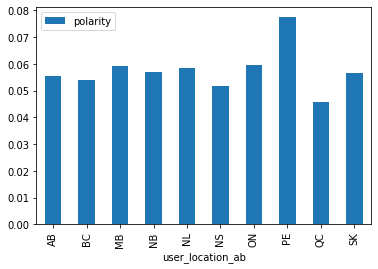

In [79]:
df2.plot.bar(x='user_location_ab', y='polarity')

In [ ]:
#Compared with different locations, Quebec is slightly lower than others